In [7]:
import osmnx as ox
import matplotlib.pyplot as plt
# import shapely.geometry as shapely
# from shapely import Point
import shapely as shapely

In [2]:
def show_map():
    G = ox.graph_from_place("Sampa", network_type="drive")
    # fig, ax = ox.plot_graph(G)
    gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
    gdf_nodes.reset_index(inplace=True)
    gdf_relationships.reset_index(inplace=True)
    # gdf_nodes.plot(markersize=0.1)
    # gdf_relationships.plot(markersize=0.01, linewidth=0.5)
    ox.plot_graph(G)
    plt.show()

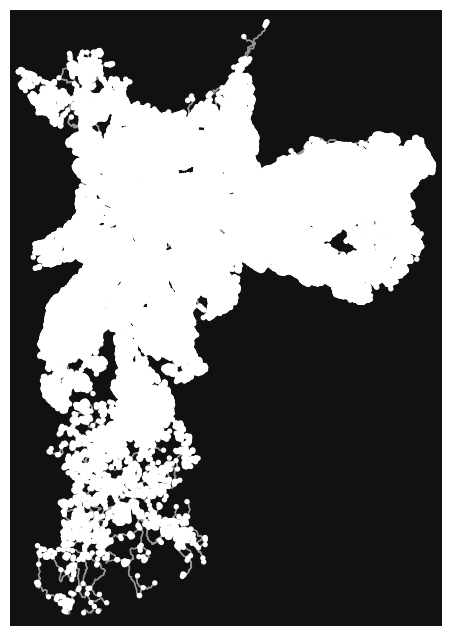

In [3]:
show_map()

In [2]:
G = ox.graph_from_place("Sampa", network_type="drive")

In [3]:
gdf_nodes, gdf_relationships = ox.graph_to_gdfs(G)
gdf_nodes.reset_index(inplace=True)
gdf_relationships.reset_index(inplace=True)

In [28]:
gdf_relationships.geometry

0         LINESTRING (-46.70397 -23.56299, -46.70373 -23...
1         LINESTRING (-46.70397 -23.56299, -46.70408 -23...
2         LINESTRING (-46.70223 -23.56746, -46.70228 -23...
3         LINESTRING (-46.69923 -23.57296, -46.69994 -23...
4         LINESTRING (-46.70207 -23.57183, -46.70181 -23...
                                ...                        
302603    LINESTRING (-46.68869 -23.76126, -46.68854 -23...
302604    LINESTRING (-46.69372 -23.75882, -46.69368 -23...
302605    LINESTRING (-46.69398 -23.7593, -46.6944 -23.7...
302606    LINESTRING (-46.43873 -23.5109, -46.43892 -23....
302607    LINESTRING (-46.43873 -23.5109, -46.43867 -23....
Name: geometry, Length: 302608, dtype: geometry

In [43]:
def linestring_to_points(geometry):
    """Converte um objeto Linestring em uma lista de coordenadas (pontos)."""
    return list(map(lambda coords: shapely.Point(coords), geometry.coords))

In [40]:
def coords_to_point(coords):
  """Converte uma lista de coordenadas (x, y) em um objeto Point."""
  return shapely.Point(coords)

In [44]:
gdf_relationships['points'] = gdf_relationships['geometry'].apply(linestring_to_points)

In [45]:
gdf_relationships['points']

0         [POINT (-46.7039651 -23.5629908), POINT (-46.7...
1         [POINT (-46.7039651 -23.5629908), POINT (-46.7...
2         [POINT (-46.7022294 -23.5674648), POINT (-46.7...
3         [POINT (-46.6992349 -23.5729625), POINT (-46.6...
4         [POINT (-46.7020748 -23.5718306), POINT (-46.7...
                                ...                        
302603    [POINT (-46.6886893 -23.7612626), POINT (-46.6...
302604    [POINT (-46.6937238 -23.7588249), POINT (-46.6...
302605    [POINT (-46.693984 -23.7592987), POINT (-46.69...
302606    [POINT (-46.4387326 -23.5108952), POINT (-46.4...
302607    [POINT (-46.4387326 -23.5108952), POINT (-46.4...
Name: points, Length: 302608, dtype: object

In [6]:
gdf_nodes.geometry

0         POINT (-46.70397 -23.56299)
1         POINT (-46.70223 -23.56746)
2         POINT (-46.69923 -23.57296)
3         POINT (-46.70207 -23.57183)
4         POINT (-46.74815 -23.53462)
                     ...             
121573    POINT (-46.63095 -23.55612)
121574    POINT (-46.68869 -23.76126)
121575    POINT (-46.69372 -23.75882)
121576     POINT (-46.69398 -23.7593)
121577     POINT (-46.43873 -23.5109)
Name: geometry, Length: 121578, dtype: geometry

In [12]:
# gdf_nodes['geojson_geometry'] = gdf_nodes['geometry'].to_json()
gdf_nodes['geometry'] = gdf_nodes['geometry'].map(lambda point: shapely.to_geojson(point))

/tmp/ipykernel_12454/2419202653.py:2: UserWarning: Geometry column does not contain geometry.
  gdf_nodes['geometry'] = gdf_nodes['geometry'].map(lambda point: shapely.to_geojson(point))


In [13]:
gdf_nodes['geometry']

0         {"type":"Point","coordinates":[-46.7039651,-23...
1         {"type":"Point","coordinates":[-46.7022294,-23...
2         {"type":"Point","coordinates":[-46.6992349,-23...
3         {"type":"Point","coordinates":[-46.7020748,-23...
4         {"type":"Point","coordinates":[-46.7481485,-23...
                                ...                        
121573    {"type":"Point","coordinates":[-46.6309481,-23...
121574    {"type":"Point","coordinates":[-46.6886893,-23...
121575    {"type":"Point","coordinates":[-46.6937238,-23...
121576    {"type":"Point","coordinates":[-46.693984,-23....
121577    {"type":"Point","coordinates":[-46.4387326,-23...
Name: geometry, Length: 121578, dtype: object

In [10]:
gdf_relationships

,u,v,key,osmid,oneway,lanes,name,highway,reversed,length,maxspeed,geometry,ref,access,bridge,junction,width,tunnel,est_width
0,573641,4345300990,0,26661283,True,2,Avenida Professor Frederico Herman Júnior,tertiary,False,33.384,NaN,"LINESTRING (-46.70397 -23.56299, -46.70373 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,573641,465879071,0,493634438,True,3,Avenida Doutora Ruth Cardoso,trunk,False,25.403,60,"LINESTRING (-46.70397 -23.56299, -46.70408 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,573643,292424978,0,"[692286399, 493634438, 936811959]",True,"[3, 4]",Avenida Doutora Ruth Cardoso,trunk,False,274.205,60,"LINESTRING (-46.70223 -23.56746, -46.70228 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,573644,25619056,0,"[278712392, 278712395, 941564782, 941564783]",True,"[5, 3]",Marginal Pinheiros (Expressa),motorway,False,324.413,"[60, 90]","LINESTRING (-46.69923 -23.57296, -46.69994 -23...",SP-015,NaN,NaN,NaN,NaN,NaN,NaN
4,577239,6549930664,0,"[768965403, 1271869585, 710311587, 768965404]",True,5,Marginal Pinheiros (Local),secondary,False,178.305,90,"LINESTRING (-46.70207 -23.57183, -46.70181 -23...",NaN,no,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302603,11813484297,6988024745,0,1168493019,False,NaN,Travessa Carlos Alberto,residential,True,124.230,NaN,"LINESTRING (-46.68869 -23.76126, -46.68854 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
302604,11813484325,7317130290,0,"[966441340, 783485857, 783485860]",False,NaN,NaN,residential,"[False, True]",358.309,NaN,"LINESTRING (-46.69372 -23.75882, -46.69368 -23...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
302605,11813484348,7316934083,0,"[783472486, 1272177934]",False,NaN,NaN,residential,"[False, True]",101.652,NaN,"LINESTRING (-46.69398 -23.7593, -46.6944 -23.7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
302606,11866827802,5399979502,0,161224927,True,NaN,Rua Mangue Vermelho,residential,False,19.655,NaN,"LINESTRING (-46.43873 -23.5109, -46.43892 -23....",NaN,NaN,NaN,NaN,NaN,NaN,NaN
